# STA 220: Midterm

### Worth 200 Points

Winter 2020

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name:

Last Name: 

Student ID: 

## Instructions

Please print your answer notebook to pdf (make sure that it is not unnecessarily long due to long output) and submit as the homework solution with your zip file.

For readability you,

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement
- you may add multiple cells between exercise cells

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

## Trans-Atlantic Slave Trade

In this homework, we will uncover some of the numbers behind the Trans-atlantic slave trade (TAST), also known as the middle passage, that brought African slaves to the Americas.  The middle passage is reported to have forcibly migrated over 10 million Africans to the Americas over a roughly 3 century time span.  Many aspects of the TAST is little known by most people, such as the countries that constituted this network of slave ships, the regions from which the slaves were taken, and the number of slaves captured from Africa.

This last number is especially important since the number of slaves taken from Africa can impact other estimates that result from this.  For example, when estimating the population of Africa in a given decade, demographers will use population growth models and more recent census data.  For example, there are roughly X number of people in Africa and such populations tend to grow at rate M.  Then if we want to calculate the population one century ahead then we just apply a simple formula that assumes that the population grows at this rate.  But if the population is being drained by the slave trade, then this number will tend to be underestimated because the growth rate is overestimated.  To account for this models need to take into account this drain on the population.

Throughout this homework you will need to follow the principles of graphical excellence and the grammar of graphics.  **Use only Plotnine for your graphics**, do not use Pyplot, Seaborn, or Plotly since they do not follow closely the grammar of graphics.  Be sure to include titles and necessary contextual captions.

**Warning:** The Trans-Atlantic Slave Trade remains one of the most horrific abuses of human rights in history.  This homework deals with the numbers behind this forced migration, please be aware that this is a sensitive topic for possibly yourself and others.   A suitable amount of respect and seriousness is required when dealing with this data.

**Exercise 1.** The data.

1. Read in the Trans-Atlantic Slave Trade database with Pandas.  Hint: if you use the unix tool `file` you can find that this CSV is encoded with iso-8859-1 character set.  Make sure that all missing values are encoded as NaN.
2. Open up the pdf file: TAST_codebook.pdf which is the data dictionary for this and other related datasets.  Many of the variables in the codebook are not in this dataset because it is describing an updated dataset. Create a list where you describe the meaning of the columns of your imported dataframe.  You can group similar columns together when describing their rough meaning, such as ownera,...,ownerp are owners of the slave ships.

Throughout we will disregard all time variables other than year since they are unreliable.

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
data = pd.read_csv('tastdb-2010.csv', encoding='iso-8859-1', na_values= ' ')
data.head()
n = data.shape[0]
# There are 98 columns in total.

In [3]:
data.head()

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
0,1,1.0,Pastora de Lima,4.0,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.0,Tibério,NaN,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.0,Paquete Real,NaN,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.0,Bom Caminho,NaN,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1.0,Benigretta,NaN,6.0,NaN,NaN,NaN,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Create a list describing the meaning of each column.
cs = list(data.columns)
tt = cs.copy()
tt.sort()
cs

['voyageid',
 'evgreen',
 'shipname',
 'national',
 'natinimp',
 'placcons',
 'yrcons',
 'placreg',
 'yrreg',
 'rig',
 'tonnage',
 'tonmod',
 'guns',
 'ownera',
 'ownerb',
 'ownerc',
 'ownerd',
 'ownere',
 'ownerf',
 'ownerg',
 'ownerh',
 'owneri',
 'ownerj',
 'ownerk',
 'ownerl',
 'ownerm',
 'ownern',
 'ownero',
 'ownerp',
 'fate',
 'fate2',
 'fate3',
 'fate4',
 'resistance',
 'ptdepimp',
 'plac1tra',
 'plac2tra',
 'plac3tra',
 'mjbyptimp',
 'npafttra',
 'sla1port',
 'adpsale1',
 'adpsale2',
 'mjslptimp',
 'portret',
 'yearam',
 'Date_dep',
 'Date_buy',
 'Date_leftAfr',
 'Date_land1',
 'Date_depam',
 'Date_end',
 'voy1imp',
 'voy2imp',
 'captaina',
 'captainb',
 'captainc',
 'crew1',
 'crew3',
 'crewdied',
 'slintend',
 'ncar13',
 'ncar15',
 'ncar17',
 'tslavesd',
 'slaximp',
 'slaarriv',
 'slas32',
 'slas36',
 'slas39',
 'slamimp',
 'menrat7',
 'womrat7',
 'boyrat7',
 'girlrat7',
 'malrat7',
 'chilrat7',
 'jamcaspr',
 'vymrtimp',
 'vymrtrat',
 'sourcea',
 'sourceb',
 'sourcec',
 'sou

In [5]:
description = [
    'voyageid: Voyage identification',
    'evgreen: Voyage in 1999 CD-ROM',
    'shipname: Name of vessel',
    'national, natinimp: Country in which the vessel registered in',
    'plcaccons: Place where vessel constructed',
    'yrcons: Year of vessel\'s construction',
    'yrreg: Yeaer of vessel\'s registration',
    'rig: Rig of vessel',
    'tonage, tonmod: Tonnage of vessel, Tonnage standardized on Briti sh measured tons',
    'guns: Guns mounted',
    'ownera-ownerp: owners of the vessel',
    'fate: Particular outcome of voyage',
    'fate2, 3: Outcomes of voyage for slaves',
    'fate4: Outcome of voyagef or owner',
    'resistance: African resistance',
    'tslavesd: Total slaves on board at departure from last slaving',
    'tslavesp: Total slaves purchased',
    'slaximp: Imputed total slaves embarked',
    'slaarriv: Total slaves arrived at first port of disembarkation',
    'slas32: Slaves disembarked at first place',
    'slamimp: Imuted total slaves',
    'sourcea-r: Sources of information'    
    ]

description

['voyageid: Voyage identification',
 'evgreen: Voyage in 1999 CD-ROM',
 'shipname: Name of vessel',
 'national, natinimp: Country in which the vessel registered in',
 'plcaccons: Place where vessel constructed',
 "yrcons: Year of vessel's construction",
 "yrreg: Yeaer of vessel's registration",
 'rig: Rig of vessel',
 'tonage, tonmod: Tonnage of vessel, Tonnage standardized on Briti sh measured tons',
 'guns: Guns mounted',
 'ownera-ownerp: owners of the vessel',
 'fate: Particular outcome of voyage',
 'fate2, 3: Outcomes of voyage for slaves',
 'fate4: Outcome of voyagef or owner',
 'resistance: African resistance',
 'tslavesd: Total slaves on board at departure from last slaving',
 'tslavesp: Total slaves purchased',
 'slaximp: Imputed total slaves embarked',
 'slaarriv: Total slaves arrived at first port of disembarkation',
 'slas32: Slaves disembarked at first place',
 'slamimp: Imuted total slaves',
 'sourcea-r: Sources of information']

**Exercise 2.** Estimating the total number of captives.

1. We will try to estimate the number of people captured into slavery and forced through the middle passage.  What variable would you use to estimate the total number of captives taken from Africa?  Let me call this variable Var A in this problem statement.   How much of the data for Var A is missing?
2. Create an initial estimate of the total number of captives taken from Africa by assuming that Var A is Missing Completely at Random.  You can simply divide the total count for the non-missing entries by the proportion of non-missing entries.  
3. What other variables do you expect to be associated with Var A and why, select 2 top possibilities?  Visualize these associations using an appropriate plot.  Do you trust the answer to 2.2?  Why or why not?

In [6]:
vara = data['tslavesd']
vara_na = np.where(vara.isna() == True)[0].shape[0]
vara.sum()

2717383.5555555555

In [7]:
data.iloc[1,:]

voyageid                                     2
evgreen                                      1
shipname                               Tibério
national                                   NaN
natinimp                                     6
placcons                                   NaN
yrcons                                     NaN
placreg                                    NaN
yrreg                                      NaN
rig                                         40
tonnage                                    NaN
tonmod                                     NaN
guns                                       NaN
ownera      Chaves, Domingos Pires dos Santos*
ownerb                                     NaN
ownerc                                     NaN
ownerd                                     NaN
ownere                                     NaN
ownerf                                     NaN
ownerg                                     NaN
ownerh                                     NaN
owneri       

In [8]:
np.where(vara.isna == True)

(array([], dtype=int64),)

**Exercise 3.** Hot-deck imputation replaces missing data with similar entries.  We will use a stochastic hot-deck imputation method, which replaces the number captured into slavery (tslavesd) with a random voyage from the same decade.  (If there is only one voyage in that decade then ignore that record.)  Construct a function that performs this random imputation method, and outputs a Series with this new imputed variable.  Calculate the total imputed tslavesd variable 100 times by performing this random imputation method 100 times.  Report the standard error, which is the standard deviation of the total imputed, along with the mean of the 100 trials.

In [9]:
data.index.values

array([    0,     1,     2, ..., 34938, 34939, 34940])

In [10]:
decade = (data['yearam'] // 10)
decade
def HotDeckImpute(row):
    # Get the decade of the data:
    d = row['yearam']//10
    # Get all the non-empty records:
    full = data[data['yearam']//10 == d]
    full = full[full['tslavesd'].isna() == False]
    # Get the total number of sample:
    n = full.shape[0]
    if n <= 1:
        return None
    if n >  1:
        # make the random selection
        r = np.random.randint(n)
        return full.iloc[r, :]


In [11]:
def HotDeckImpute2():
    # Initialize the new variable:
    ss = data['tslavesd'][:500].copy()
    # Get the indices that is nan:
    idxs = ss[ss.isna()].index.values
    print(idxs)
    for i in idxs:
        row = data.loc[i, :]
        # Get the decade of the data:
        d = row['yearam']//10
        # Get all the non-empty records:
        full = data[data['yearam']//10 == d]
        full = full[full['tslavesd'].isna() == False]
        # Get the total number of sample:
        n = full.shape[0]
        if n <= 1:
            continue
        if n >  1:
            # make the random selection
            r = np.random.randint(n)
            ss[i] = data['tslavesd'][r]
    return ss

**Exercise 4.** The flag that the ships flew.

1. We want to understand the trends of the nationality of the slave ships (the flag that they flew under is in the national variable).  Subselect the values of `national` that have more than 100 voyages with that value.  
2. Create a DataFrame that filters out the voyages where `national` does not have one of these values.  You should be retaining voyages with only these most common values.
3. Create a variable, `flag`, that is a string of easily readable names for these values by looking them up in the pdf codebook.
4. Using Plotnine, plot the counts of the voyages by flag as a function of voyage year.  Think about how best to display the count of a voyage by year and then how should you be including the flag variable.
5. In this plot, what are the geometric elements and aesthetic mappings?  What other components of the grammar of graphics are you using?
6. Do you observe any abrupt changes in the patterns of these counts for a given flag?  Investigate the cause for this change (using Google, etc.).

In [12]:
# 1.Subselect:
nationCount = data['national'].groupby(by = data['national']).count()
nations = nationCount[nationCount > 100].index.values
nations # Spain, Portugal, Brazil, Great Britain, Netherlands, U.S.A, France, Denmark.

array([ 1.,  4.,  5.,  7.,  8.,  9., 10., 11.])

In [13]:
# 2.Filtered data:
data_filtered = data[data['national'].isin(nations)]
data_filtered.head()

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
0,1,1.0,Pastora de Lima,4.0,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,16,1.0,Sociedade,4.0,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,95,1.0,Patrocínio,4.0,6.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,114,1.0,NaN,10.0,10.0,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,115,1.0,NaN,10.0,10.0,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# 3. Create flag:
flag = ['Sp', 'Po', 'Br', 'GB', 'Ne', 'USA', 'Fr', 'De']

# Generate the dictionary in order to map:
mapping = {key:value for (key, value) in zip(nations, flag)}

# Create new varaible and map to national:
data_filtered['flag'] = data_filtered['national'].map(mapping)

In [16]:
data_filtered

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,flag
0,1,1.0,Pastora de Lima,4.0,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Po
15,16,1.0,Sociedade,4.0,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Po
94,95,1.0,Patrocínio,4.0,6.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Po
113,114,1.0,NaN,10.0,10.0,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fr
114,115,1.0,NaN,10.0,10.0,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fr
115,116,1.0,Eleonora,4.0,6.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Po
116,117,1.0,Rôdeur,10.0,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fr
117,118,1.0,NaN,8.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ne
118,119,1.0,Aimable Henriette,10.0,10.0,10720.0,1815.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fr
119,120,1.0,Daphnée,10.0,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fr


In [15]:
data_filtered['flag']

0         Po
15        Po
94        Po
113       Fr
114       Fr
115       Po
116       Fr
117       Ne
118       Fr
119       Fr
120       Fr
121       Po
122       Fr
123       Sp
124       Sp
125       Po
126       Sp
127       Sp
128      USA
129       Sp
130       Po
131       Fr
132       Sp
140       Po
154       Po
157       Po
165       Po
171       Po
197       Br
199       Po
        ... 
34904    USA
34905    USA
34906     Br
34907     Br
34908     Br
34910     Br
34912     Br
34913     Br
34914     Br
34915    USA
34916     Br
34917     GB
34918     Po
34919     Br
34920     Br
34921     Br
34924     Br
34925     Fr
34926     Po
34928     Po
34929     Po
34930     Po
34931     Br
34932     Po
34933     Po
34934     Po
34935     Fr
34936     Po
34937     Fr
34939     Po
Name: flag, Length: 25478, dtype: object

In [17]:
# 4. Using Plotnine, plot the counts of the voyages by flag as a function of voyage year. Think about how best to display the count of a voyage by year and then how should you be including the flag variable.
data_filtered.head()
g = data_filtered.groupby(['yearam', 'flag'])
gcount = pd.DataFrame(g['voyageid'].count())
# ggplot(gcount, aes(x = 'yearam', y =  ))

In [18]:
g['voyageid'].count()

yearam  flag
1526    Sp       2
1527    Sp       1
1532    Po       1
1535    Po       1
1563    GB       3
1565    GB       4
1567    GB       4
1568    GB       6
1571    Fr       1
1582    Po       1
1583    GB       1
1588    Po       1
1593    Sp      11
1594    Sp       4
1595    Po       8
        Sp       1
1596    Po      17
1597    Po      25
1598    Po      28
1599    Po      32
1600    Po      28
1601    Po      27
1602    Po       7
1603    Po       4
1604    Po       4
1605    Po       7
1606    Ne       1
        Po       1
1607    Po       2
1608    Po       9
                ..
1853    Sp       4
        USA      5
1854    USA      6
1855    Sp       3
        USA      3
1856    Po       2
        Sp       2
        USA      7
1857    Po       1
        Sp       4
        USA     16
1858    Sp       2
        USA     26
1859    Po       1
        Sp       8
        USA     26
1860    Fr       1
        Sp       1
        USA     24
1861    Fr       1
        Sp       4

In [19]:
gcount.columns = ['count']
gcount.reset_index(inplace = True)
gcount

,yearam,flag,count
0,1526,Sp,2
1,1527,Sp,1
2,1532,Po,1
3,1535,Po,1
4,1563,GB,3
5,1565,GB,4
6,1567,GB,4
7,1568,GB,6
8,1571,Fr,1
9,1582,Po,1


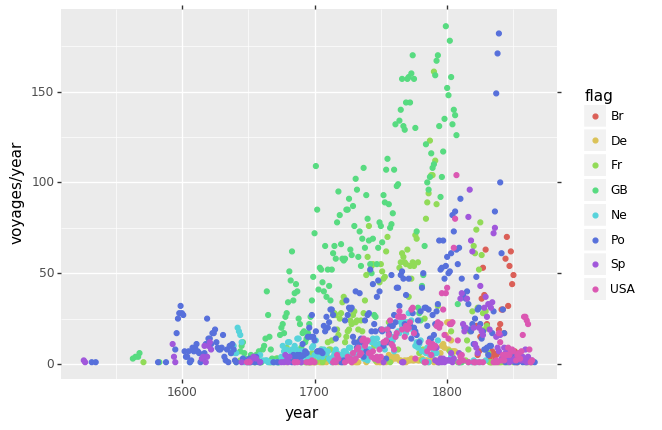

<ggplot: (-9223372029311575243)>

In [20]:
ggplot(gcount, aes(x = 'yearam', y = 'count', color = 'flag')) + geom_point() +ylab('voyages/year') + xlab('year')

In [21]:
# 5. In this plot, what are the geometric elements and aesthetic mappings? What other components of the grammar of graphics are you using?




In [22]:
# Do you observe any abrupt changes in the patterns of these counts for a given flag? Investigate the cause for this change (using Google, etc.).

**Exercise 5.** Looking at some of these ships.

1. Search for the slave ship mentioned in the following wikipedia article: https://en.wikipedia.org/wiki/Brookes_(ship) Hint: Look at all records of ships with 'Brook' in the name and try to match the characteristics to those described.  How many voyages for this ship are in the data (try to exclude ships with the same name)?
2. Create a variable that is True if there was a resistance (like a slave revolt) on the ship.  Plot the density of ships as a function of year with and without revolts and compare these distributions.
3. The movie Amistad was based on a real slave ship and slave uprising.  Read about it here: https://en.wikipedia.org/wiki/La_Amistad  Try to find this ship by searching for it by name and also searching for ships in the same 10 year period as this event with a slave resistance.  If you think you found it describe it, otherwise describe the events of another voyage that you did find.  

In [23]:
# 1. Search for the slave ship mentioned in the following wikipedia article: https://en.wikipedia.org/wiki/Brookes_(ship) Hint: Look at all records of ships with 'Brook' in the name and try to match the characteristics to those described. How many voyages for this ship are in the data (try to exclude ships with the same name)?

# Feature 1: Ship of 18 century: Launched 1781, sold 1804.
# Feature 2: British slave boat
# Feature 3: Allow 454 african slaves(total slaves not more than 454), but at most 609, 638, 744
# Feature 4: Tonnage: 300 tones
all_brooke = data[data['shipname'].str.contains('Brook') == True]
all_brooke[(all_brooke['yearam'] <= 1804) & (all_brooke['yearam'] >= 1781) & 
            (all_brooke['national'] == 7) & (all_brooke['tslavesd'] <=744) ]
# 7 Record in total.

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
29534,80663,1.0,Brooks,7.0,7.0,10432.0,1781.0,10432.0,1781.0,4.0,...,"LST,1744-1786","Crooks,55","LList, 19 Nov 1782","LList, 25 Feb 1783","Williams,585-86",NaN,NaN,NaN,NaN,NaN
29535,80664,1.0,Brooks,7.0,7.0,10432.0,1781.0,10432.0,1783.0,4.0,...,"LST,1744-1786","Lambert,73,81-101","Lambert,73,109-21","LList, 20 July 1784","LList, 6 Aug 1784","LList, 31 Aug 1784",NaN,NaN,NaN,NaN
29536,80665,1.0,Brooks,7.0,7.0,10432.0,1781.0,10432.0,1783.0,4.0,...,"PP,1789(629),XXIV","Lambert,69,III,Appendix,Jamaica","LList, 31 Jan 1786","LList, 14 Apr 1786","Williams,585",NaN,NaN,NaN,NaN,NaN
29537,80666,1.0,Brooks (a) Brookes,7.0,7.0,10432.0,1781.0,10432.0,1786.0,4.0,...,"PP,1789(629),XXIV","Lambert,68,41-3","cc, 13 Oct 1787","craig,19","LList, 11 Dec 1787","LList, 12 Feb 1788",T70/1476,"Williams,585","Huntington,ST,vol.26,87.11.10.",NaN
29539,80668,1.0,Brooks,7.0,7.0,10432.0,1781.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29540,80669,1.0,Brooks,7.0,7.0,10432.0,1781.0,NaN,NaN,4.0,...,"LList, 30 May 1797","MMM, C/EX/L/5/2,1791.050",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29544,80673,1.0,Brooks,7.0,7.0,10432.0,1781.0,NaN,NaN,4.0,...,"LList, 2 Apr 1805","MMM, C/EX/L/5/5,1804.050",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


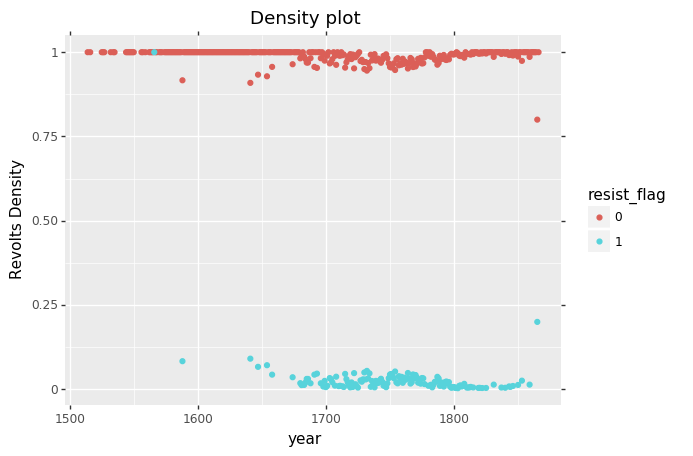

<ggplot: (-9223372029299614183)>

In [66]:
# 2. Create a variable that is True if there was a resistance (like a slave revolt) on the ship. Plot the density of ships as a function of year with and without revolts and compare these distributions.

# Make a copy of data:
tt = data.copy()
# Create a new variable:
tt['resist_flag'] = tt['resistance'].apply(lambda x: '1' if x == x else '0')
tt.head()

# Group the data

# To calculate the total voyages:
g1 = tt.groupby('yearam')

# To calculate the voyages grouped by year and resis_flag:
g2 = tt.groupby(['yearam', 'resist_flag'])


resist_count = pd.DataFrame(g2['resist_flag'].count())
resist_count.columns = ['rcount']

resist_count.reset_index(inplace = True)
resist_count


year_count = pd.DataFrame(g1['voyageid'].count())
year_count.columns = ['tcount']
year_count.reset_index(inplace = True)
year_count

# Merge 2 dataframe:
resist_density = pd.merge(resist_count, year_count, how = 'left', on = 'yearam')

# Calculate the density:
resist_density['resist_density'] = resist_density['rcount']  / resist_density['tcount']
resist_density['nonresist_density'] = 1 - resist_density['resist_density']

# Get the plot:
ggplot(resist_density, aes(x = 'yearam', y = 'resist_density', color = 'resist_flag')) + geom_point() +\
     ylab('Revolts Density') + xlab('year') + labs(title = 'Density plot')



**Exercise 6.** Other patterns.

1. The arrival and departure locations are quite detailed.  Look in the appendix of the codebook for the location codes.  Make a coarser version of both arrival and departure port variables (select just the last departure and first arrival) so that for example,  
```
30000 Caribbean 36100 Martinique 36101 Fort-Royale
```
is just encoded as '3' or Caribbean.

2. Plot the trend of voyages as a function of arrival location.  What trends do you see?

3. Do the same for departure location.

4. Plot the ratio of captives that are men as a function of year.  Include a smoother to describe the over all trend.  Also include in the plot another possible confounding variable.

5. Describe the geoms, aesthetic mappings, and other aspects of the plot.

In [64]:
# 1. The arrival and departure locations are quite detailed. Look in the appendix of the codebook for the location codes. Make a coarser version of both arrival and departure port variables (select just the last departure and first arrival) so that for example,30000 Caribbean 36100 Martinique 36101 Fort-Royale is just encoded as '3' or Caribbean.

broad_location = {
    '1': 'Europe', 
    '2': 'Mailand North Aemrica',
    '3': 'Caribbean',
    '4': 'Spanish Mailand',
    '5': 'Brazil',
    '6': 'Africa',
    '8': 'Others'
    }

tt = data.copy()

tt['arrival_code'] = str(int(tt['sla1port'] // 10000))
tt['arrival'] = tt['arrival_code'].map(broad_location)

tt['departure_code'] = str(int(tt['ptdepimp'] // 10000)
tt['departure'] = tt['departure_code'].map(broad_loction)

np.where(tt['departure_code'] != tt['arrival_code'])[0].shape

TypeError: cannot convert the series to <class 'int'>

In [63]:
str(5.0)

'5.0'

In [60]:
tt['arrival_code']

0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
5        5.0
6        5.0
7        5.0
8        5.0
9        5.0
10       5.0
11       5.0
12       5.0
13       5.0
14       5.0
15       5.0
16       5.0
17       5.0
18       5.0
19       5.0
20       5.0
21       5.0
22       5.0
23       5.0
24       5.0
25       5.0
26       5.0
27       5.0
28       5.0
29       5.0
        ... 
34911    NaN
34912    NaN
34913    NaN
34914    NaN
34915    NaN
34916    NaN
34917    NaN
34918    NaN
34919    NaN
34920    NaN
34921    NaN
34922    NaN
34923    NaN
34924    NaN
34925    NaN
34926    NaN
34927    NaN
34928    NaN
34929    NaN
34930    NaN
34931    NaN
34932    NaN
34933    NaN
34934    NaN
34935    NaN
34936    NaN
34937    NaN
34938    NaN
34939    NaN
34940    NaN
Name: arrival_code, Length: 34941, dtype: float64

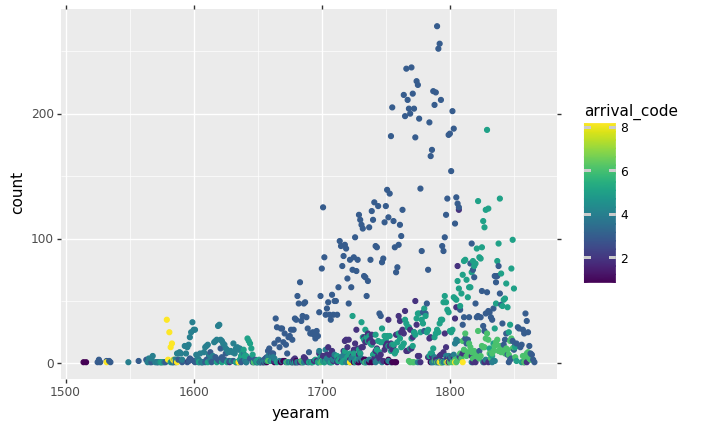

<ggplot: (7562670898)>

In [61]:
# 2. Plot the trend of voyages as a function of arrival location. What trends do you see?
g1 = tt.groupby(['yearam', 'arrival_code'])
arrival_count = pd.DataFrame(g1['voyageid'].count())
arrival_count.columns = ['count']
arrival_count.reset_index(inplace = True)

ggplot(arrival_count, aes(x = 'yearam', y = 'count', color = 'arrival_code')) + geom_point()
